# Dataset Description

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

mushrooms described in terms of physical characteristics; classification: poisonous or edible

# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

# Loading the dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)


In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


# Exploratory Data Analysis

In [6]:
df.shape  #checking the data dimension

(8124, 23)

In [7]:
df.dtypes 

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

We have 8124 rows and 23 columns including the target column
All the columns are object dtype

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
#checking the null values in dataset
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

No NaN values present in any of the columns

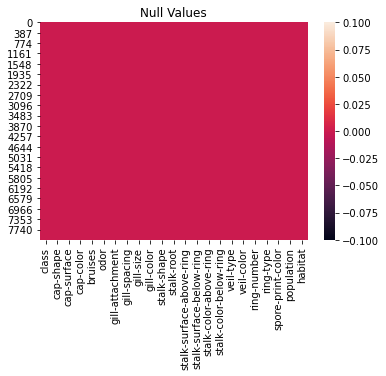

In [10]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

There are no null values in our dataset

In [11]:
#statistical summary
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


As all the columns have categorical data,so we can't get any statistical info from above table

Now we have to perform label encoding to convert all the categorical data into numerical form indicating class labels

# Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
for col in df.columns:
    df[col]=le.fit_transform(df[col])
    
df.head()    

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [14]:
#to check the target labels
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [17]:
#to check the different attribute type of each column and check their value_counts
for i in df.columns[1:]:
    print(i)
    print(df[i].value_counts())
    print('\n')

cap-shape
5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64


cap-surface
3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64


cap-color
4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64


bruises
0    4748
1    3376
Name: bruises, dtype: int64


odor
5    3528
2    2160
7     576
8     576
3     400
0     400
6     256
1     192
4      36
Name: odor, dtype: int64


gill-attachment
1    7914
0     210
Name: gill-attachment, dtype: int64


gill-spacing
0    6812
1    1312
Name: gill-spacing, dtype: int64


gill-size
0    5612
1    2512
Name: gill-size, dtype: int64


gill-color
0     1728
7     1492
10    1202
5     1048
2      752
3      732
9      492
4      408
1       96
11      86
6       64
8       24
Name: gill-color, dtype: int64


stalk-shape
1    4608
0    3516
Name: stalk-shape, dtype: int64


stalk-root
1    3776
0    2480
3    1120
2  

# Data Visualization

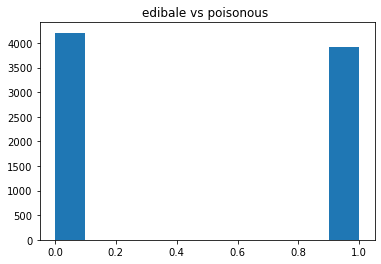

In [20]:
#univariate analysis
df['class'].hist(grid=False)
plt.title('edibale vs poisonous ')
plt.show()

# Checking Correlation

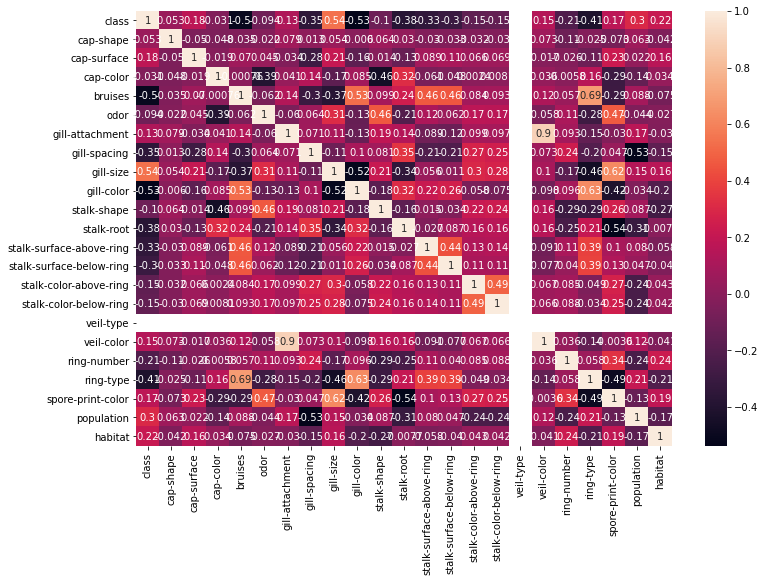

In [21]:
#Multivariate analysis
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
#correlation with respect to target variable
tar_corr=df.corr()
tar_corr['class'].sort_values(ascending=False)

class                       1.000000
gill-size                   0.540024
population                  0.298686
habitat                     0.217179
cap-surface                 0.178446
spore-print-color           0.171961
veil-color                  0.145142
gill-attachment             0.129200
cap-shape                   0.052951
cap-color                  -0.031384
odor                       -0.093552
stalk-shape                -0.102019
stalk-color-below-ring     -0.146730
stalk-color-above-ring     -0.154003
ring-number                -0.214366
stalk-surface-below-ring   -0.298801
stalk-surface-above-ring   -0.334593
gill-spacing               -0.348387
stalk-root                 -0.379361
ring-type                  -0.411771
bruises                    -0.501530
gill-color                 -0.530566
veil-type                        NaN
Name: class, dtype: float64

as all the attributes are of categorical type,so we do not need to check the outliers and remove the skewness

In [23]:
#splittig the independent and target variable in x and y
x=df.drop('class',axis=1)
y=df['class']

# Finding the best random state

In [24]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i

print('Best Accuracy is',maxaccu,'on random state',maxrs)        

Best Accuracy is 0.9585726004922067 on random state 21


We have found best random_state as 21.We will create our train_test_split using this random_state(21)

# Creating train_test split

In [25]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=21)

In [26]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9585726004922067
[[1217   51]
 [  50 1120]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1268
           1       0.96      0.96      0.96      1170

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



In [27]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
[[1268    0]
 [   0 1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [29]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9232977850697293
[[1167  101]
 [  86 1084]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1268
           1       0.91      0.93      0.92      1170

    accuracy                           0.92      2438
   macro avg       0.92      0.92      0.92      2438
weighted avg       0.92      0.92      0.92      2438



In [32]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.9885151763740772
[[1264    4]
 [  24 1146]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1268
           1       1.00      0.98      0.99      1170

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



In [31]:
knn=KNeighborsClassifier() #--default k=5
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.9971287940935193
[[1263    5]
 [   2 1168]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1268
           1       1.00      1.00      1.00      1170

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



We are getting highest accuracy in Decisiontree,randomforest but it can be due to overfitting,
so we need to check the cross_val_score then select our best model

In [33]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print('Cross validation score of LogisticRegression model:',scr.mean())

Cross validation score of LogisticRegression model: 0.8388562334217508


In [34]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=5)
print('Cross validation score of DecisionTree model:',scr.mean())

Cross validation score of DecisionTree model: 0.9054381205001896


In [39]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf,x,y,cv=5)
print('Cross validation score of RandomForest:',scr.mean())

Cross validation score of RandomForest: 0.8883198938992043


In [36]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(gnb,x,y,cv=5)
print('Cross validation score of GaussianNB:',scr.mean())

Cross validation score of GaussianNB: 0.7259685486926866


In [37]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc,x,y,cv=5)
print('Cross validation score of SVC:',scr.mean())

Cross validation score of SVC: 0.841292231906025


In [38]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(knn,x,y,cv=5)
print('Cross validation score of KNN:',scr.mean())

Cross validation score of KNN: 0.8815549071618036


Minimum difference in accuracy and cross valiadtion is for DecisionTreeclassifier(0.09),so this is our best model.

# Hyper Parameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
#creating parameter list to pass in GridSearchCV

parameters={'max_depth':np.arange(2,15),
           'criterion':['gini','entropy']}

In [42]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [43]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [44]:
#printing the best parameter found by GridSearchCV
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [45]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [46]:
accuracy_score(y_test,GCV_pred)

1.0

# Saving the best model

In [47]:
import joblib
joblib.dump(GCV.best_estimator_,'MushroomModel.obj')

['MushroomModel.obj']